# Recherche de facteurs d'influence sur le temps de sommeil
_Darnatigues Rémy / Guiraud Philippe_

## Nous allons ici procéder à l'analyse des variables quantitatives de notre modèle en fonction du genre

Dans un premier temps, nous allons réimporter notre fichier et réappliquer les modifications réalisées.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
fichier = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", sep=",")
fichier.drop('Person ID', axis = 1, inplace = True)
systolique = []  # valeur 1
diastolique = []  # valeur 2
for value in fichier["Blood Pressure"]:
    val_1, val_2 = value.split('/')
    systolique.append(int(val_1))  
    diastolique.append(int(val_2)) 
fichier['Systolic'] = systolique
fichier['Diastolic'] = diastolique
fichier.drop('Blood Pressure', axis = 1, inplace = True)
fichier["Sleep Disorder"] = fichier["Sleep Disorder"].fillna("Aucun")
fichier["BMI Category"] = fichier["BMI Category"].replace({"Normal Weight": "Normal"})
Y = fichier["Sleep Duration"]
genre = fichier["Gender"]
metier = fichier["Occupation"]
IMC = fichier["BMI Category"]
sleepdis = fichier["Sleep Disorder"]
age = fichier["Age"]
activ = fichier["Physical Activity Level"]
battement = fichier["Heart Rate"]
pas = fichier["Daily Steps"]
stress = fichier["Stress Level"]
systolique = fichier["Systolic"]
diastolique = fichier["Diastolic"]

## Nous réalisons des boxplots, des histogrammes et des nuages de points de nos valeurs pour observer l'étendue des effectifs et comparer en fonction du genre.

##### Nous rappelons les effectif et fréquence par genre :

In [7]:
table_freq = pd.DataFrame({
    "Effectif": genre.value_counts(),
    "Fréquence (%)": np.round(genre.value_counts(normalize=True) * 100, 2)
})

print("Tableau des effectifs pour le genre :")
print(tabulate(table_freq, headers="keys", tablefmt="grid"))

Tableau des effectifs pour le genre :
+----------+------------+-----------------+
| Gender   |   Effectif |   Fréquence (%) |
+==========+============+=================+
| Male     |        189 |           50.53 |
+----------+------------+-----------------+
| Female   |        185 |           49.47 |
+----------+------------+-----------------+


##### et nous commençons par afficher les boxplots, histogrammes et nuages de points par genre de notre variable cible, la durée du temps de sommeil :

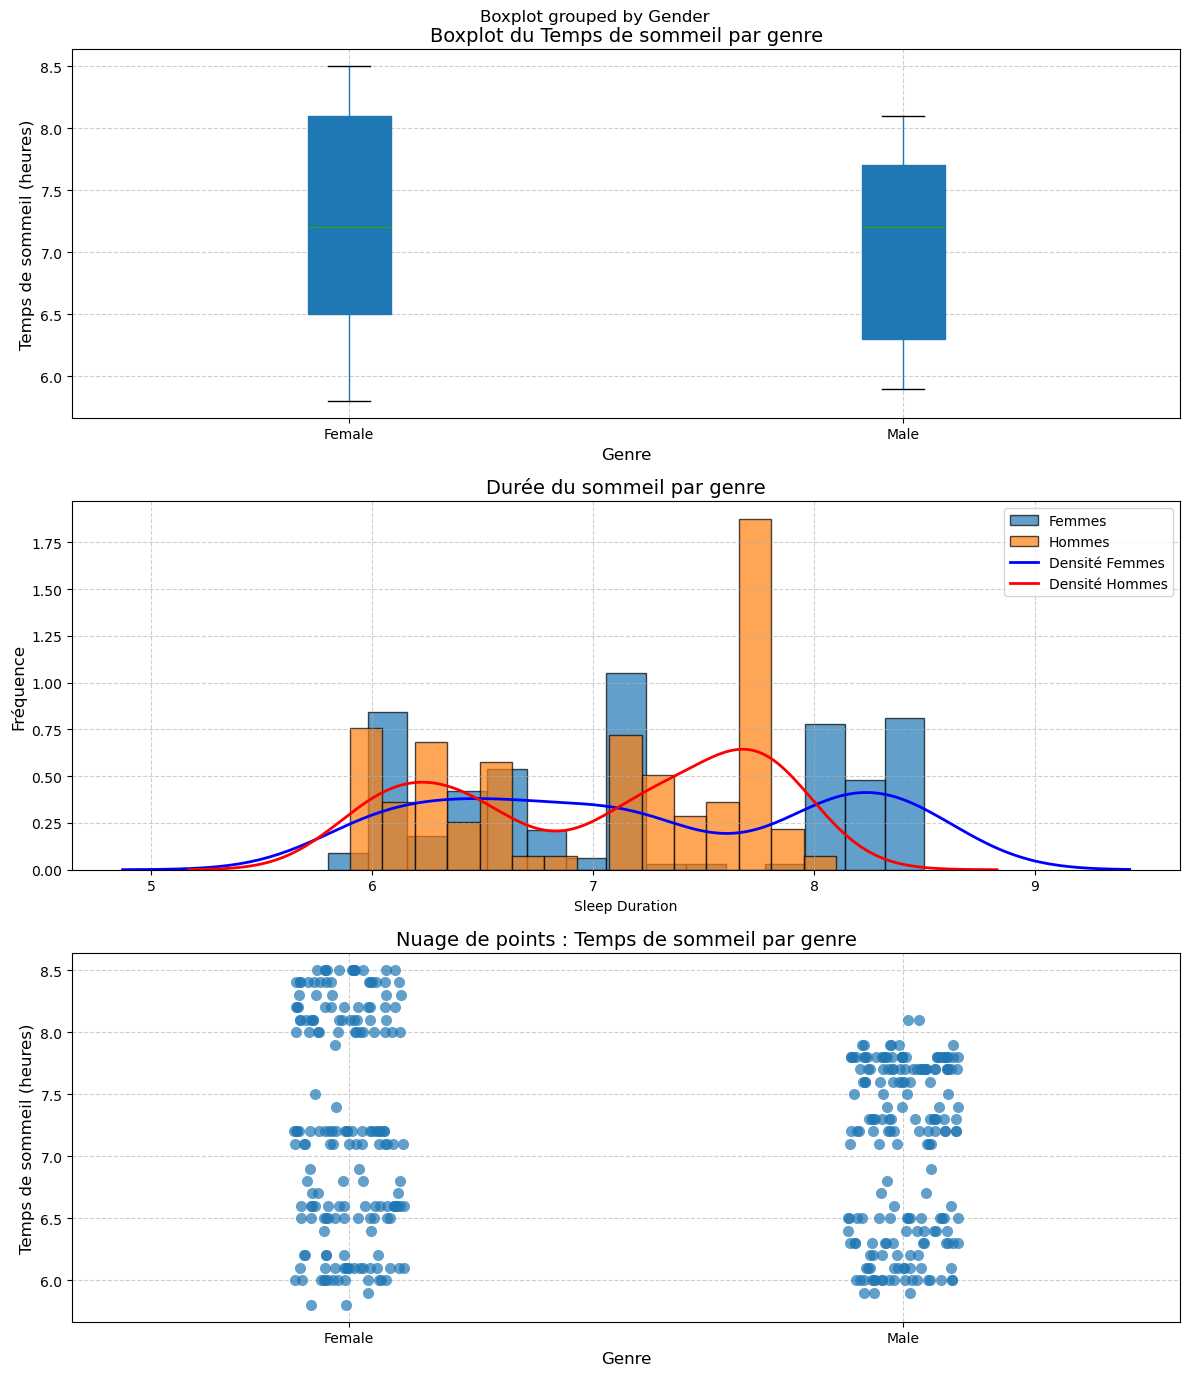

In [45]:
# Préparation des données
femmes = fichier[fichier["Gender"] == "Female"]["Sleep Duration"]
hommes = fichier[fichier["Gender"] == "Male"]["Sleep Duration"]

fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# Boxplot par genre
fichier.boxplot(column="Sleep Duration", by="Gender", patch_artist=True, ax=axes[0])
axes[0].set_title("Boxplot du Temps de sommeil par genre", fontsize=14)
axes[0].set_xlabel("Genre", fontsize=12)
axes[0].set_ylabel("Temps de sommeil (heures)", fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.6)

# Histogramme par genre avec courbes de densité
axes[1].set_title("Durée du sommeil par genre", fontsize=14)
axes[1].set_ylabel("Fréquence", fontsize=12)
axes[1].grid(True, linestyle="--", alpha=0.6)

# Histogrammes manuels pour chaque genre
axes[1].hist(femmes, bins=15, edgecolor="black", alpha=0.7, label="Femmes", density=True)
axes[1].hist(hommes, bins=15, edgecolor="black", alpha=0.7, label="Hommes", density=True)

# Ajout des courbes de densité
sns.kdeplot(femmes, color="blue", ax=axes[1], label="Densité Femmes", linewidth=2)
sns.kdeplot(hommes, color="red", ax=axes[1], label="Densité Hommes", linewidth=2)

# Légende
axes[1].legend()

# Nuage de points par genre
sns.stripplot(x=genre, y=Y, data=fichier, jitter=True, size=8, alpha=0.7, order=["Female", "Male"], ax=axes[2])
axes[2].set_xlabel("Genre", fontsize=12)
axes[2].set_ylabel("Temps de sommeil (heures)", fontsize=12)
axes[2].set_title("Nuage de points : Temps de sommeil par genre", fontsize=14)
axes[2].grid(True, linestyle="--", alpha=0.6)

# Ajuste l'espacement pour éviter le chevauchement
plt.tight_layout()
plt.show()

On observe une distribution plus étendue du temps de sommeil chez les femmes, ce qui, en comparant visuellement les nuages de points, donne l'impression qu'elles dorment plus. En réalité les boxplots ainsi que les histogrammes montrent que la médiane est similaire entre les deux sexes, ce qui est notamment dû à un nombre important d'hommes dormant entre 7,5 et 8 heures par jour.

##### Nous allons maintenant faire la même chose mais pour les variables explicatives :

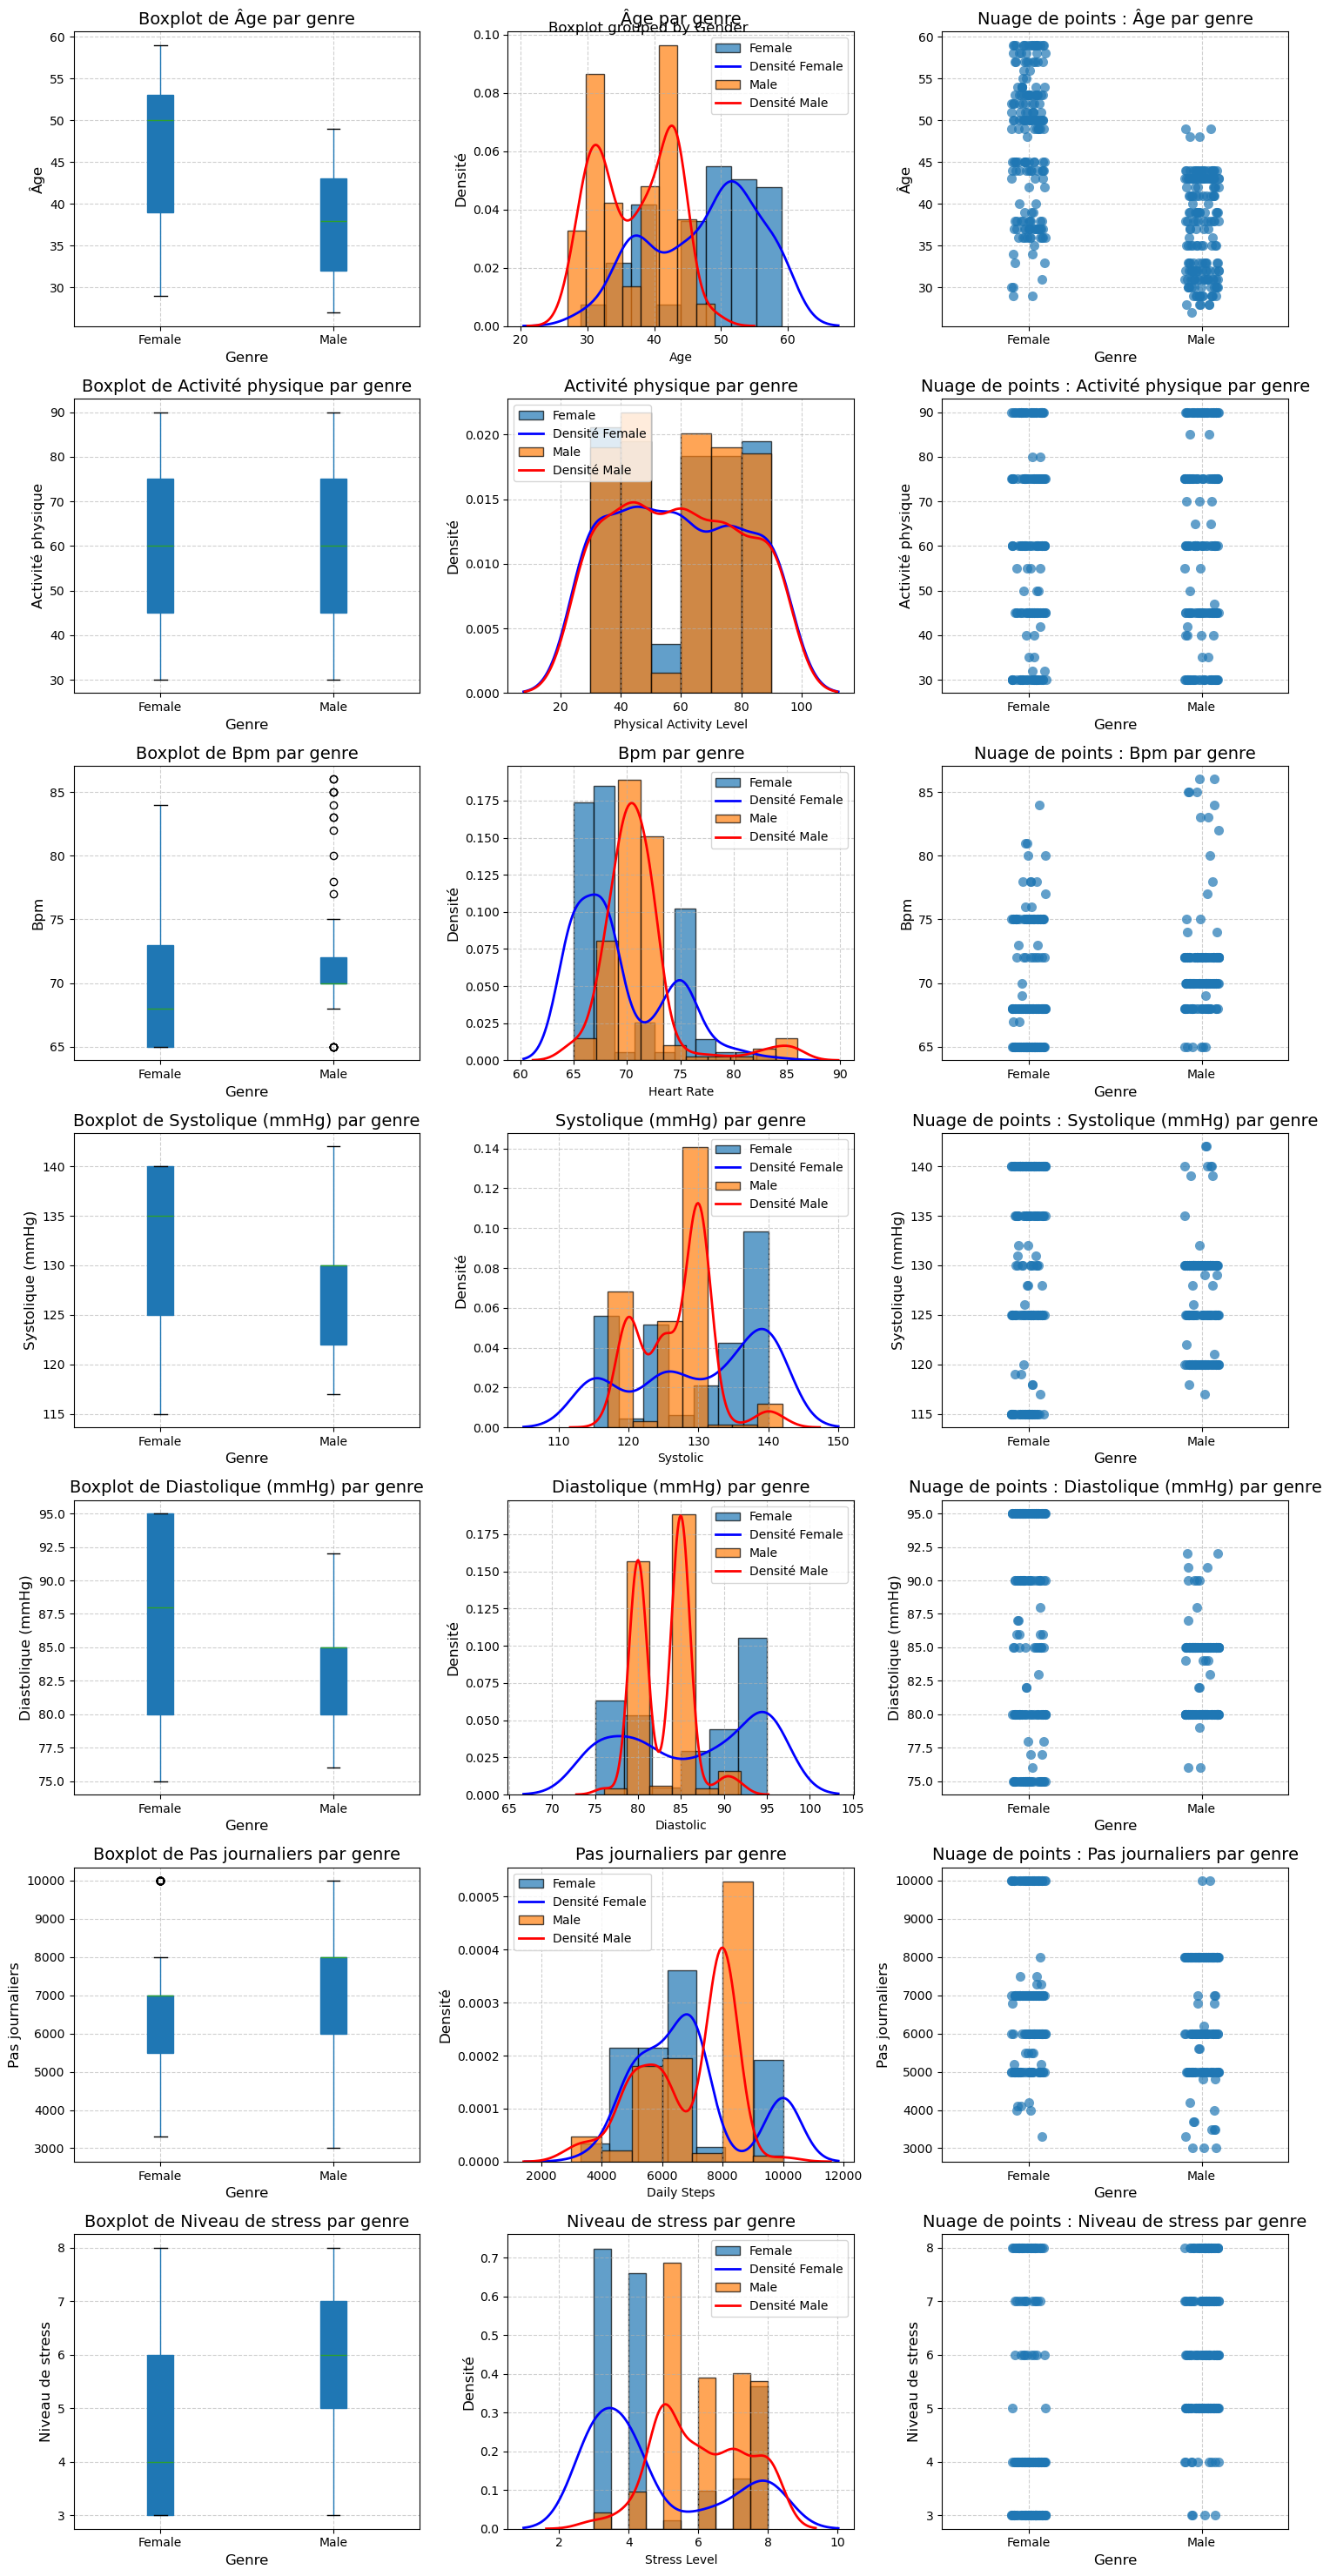

In [113]:
# Liste des variables à analyser
variables = [
    ("Age", "Âge", 8),
    ("Physical Activity Level", "Activité physique", 6),
    ("Heart Rate", "Bpm", 10),
    ("Systolic", "Systolique (mmHg)", 7),
    ("Diastolic", "Diastolique (mmHg)", 6),
    ("Daily Steps", "Pas journaliers", 7),
    ("Stress Level", "Niveau de stress", 10)
]

fig, axes = plt.subplots(len(variables), 3, figsize=(15, 30))

for i, (var, label, bin) in enumerate(variables):
    # Boxplot
    fichier.boxplot(column=var, by="Gender", patch_artist=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot de {label} par genre", fontsize=14)
    axes[i, 0].set_xlabel("Genre", fontsize=12)
    axes[i, 0].set_ylabel(label, fontsize=12)
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)

    # Histogramme avec courbe de densité
    axes[i, 1].set_title(f"{label} par genre", fontsize=14)
    axes[i, 1].set_ylabel("Densité", fontsize=12)
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)

    for gender, color in [("Female", "blue"), ("Male", "red")]:
        subset = fichier[fichier["Gender"] == gender][var]
        axes[i, 1].hist(subset, bins=bin, edgecolor="black", alpha=0.7, density=True, label=gender)
        sns.kdeplot(subset, color=color, ax=axes[i, 1], label=f"Densité {gender}", linewidth=2)

    axes[i, 1].legend()

    # Nuage de points
    sns.stripplot(x="Gender", y=var, data=fichier, jitter=True, size=8, alpha=0.7, order=["Female", "Male"], ax=axes[i, 2])
    axes[i, 2].set_xlabel("Genre", fontsize=12)
    axes[i, 2].set_ylabel(label, fontsize=12)
    axes[i, 2].set_title(f"Nuage de points : {label} par genre", fontsize=14)
    axes[i, 2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

**Remarques par variable**  
*Age :* Les femmes de notre base de données sont plus âgées que les hommes.  
*Activité physique quotidienne :* Hommes et femmes sont autant actifs les uns que les autres.  
*Battement cardiaque au repos :* Nous avons un étalement très large des valeurs pour les deux sexes. Pour les hommes cela se traduit par de nombreux outliers dont il faudra déterminer ce que l'on fait.  
*Pressions systolique et diastolique :* Cette fois ce sont les valeurs femmes qui sont plus étalées.  
*Nombre de pas journaliers :* Il semble y avoir différents groupes au sein de chaque sexe, globalement peu de choses à dire.  
*Niveau de stress :* Ici une nette différence se remarque, les hommes semblent bien plus stressés que les femmes ce que nous ne parvenons pas à expliquer sans remettre en cause la fiabilité de ces valeurs. En effet, il s'agit de **notes subjectives** liées au ressenti de chacun, il est donc possible que le stress soit le même pour chaque sexe mais que les femmes "l'endurent" mieux que les hommes car elles y sont plus souvent confrontées (grande proportion d'infirmières parmi elles).


**On réalise maintenant la matrice de corrélation pour les hommes :**

In [88]:
indice_hommes = np.where(fichier["Gender"] == "Male")

Y_hommes = fichier.iloc[indice_hommes]["Sleep Duration"]
age_hommes = fichier.iloc[indice_hommes]["Age"]
activ_hommes = fichier.iloc[indice_hommes]["Physical Activity Level"]
systolic_hommes = fichier.iloc[indice_hommes]["Systolic"]
diastolic_hommes = fichier.iloc[indice_hommes]["Diastolic"]
bpm_hommes = fichier.iloc[indice_hommes]["Heart Rate"]
pas_hommes = fichier.iloc[indice_hommes]["Daily Steps"]
stress_hommes = fichier.iloc[indice_hommes]["Stress Level"]

In [90]:
matcorrhommes = pd.DataFrame(np.column_stack([Y_hommes, age_hommes, activ_hommes, bpm_hommes, systolic_hommes, diastolic_hommes, pas_hommes, stress_hommes]), 
                  columns=['Y', 'age', 'activ', 'bpm', 'syst', 'diast', 'pas', 'stress'])

**et la matrice de corrélation pour les femmes :**

In [18]:
indice_femmes = np.where(fichier["Gender"] == "Female")

Y_femmes = fichier.iloc[indice_femmes]["Sleep Duration"]
age_femmes = fichier.iloc[indice_femmes]["Age"]
activ_femmes = fichier.iloc[indice_femmes]["Physical Activity Level"]
systolic_femmes = fichier.iloc[indice_femmes]["Systolic"]
diastolic_femmes = fichier.iloc[indice_femmes]["Diastolic"]
bpm_femmes = fichier.iloc[indice_femmes]["Heart Rate"]
pas_femmes = fichier.iloc[indice_femmes]["Daily Steps"]
stress_femmes = fichier.iloc[indice_femmes]["Stress Level"]

In [19]:
matcorrfemmes = pd.DataFrame(np.column_stack([Y_femmes, age_femmes, activ_femmes, bpm_femmes, systolic_femmes, diastolic_femmes, pas_femmes, stress_femmes]), 
                  columns=['Y', 'age', 'activ', 'bpm', 'syst', 'diast', 'pas', 'stress'])

**On peut maintenant comparer les deux matrices de corrélation :**

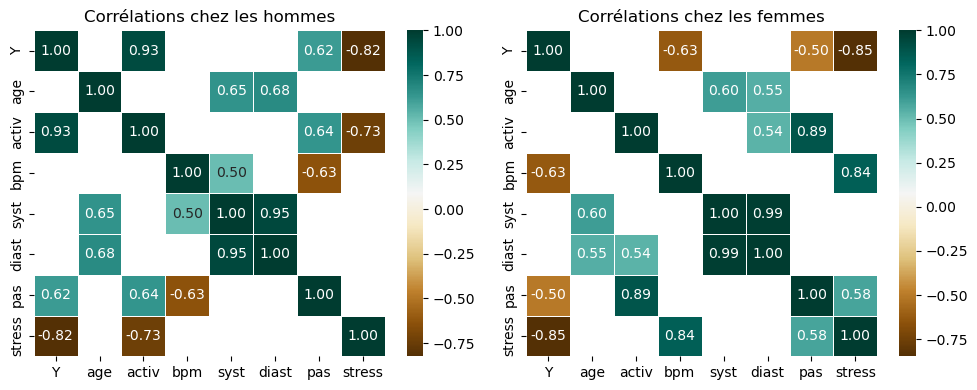

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 ligne, 2 colonnes

sns.heatmap(matcorrhommes.corr()[matcorrhommes.corr().abs() > 0.5], annot=True, cmap="BrBG", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Corrélations chez les hommes")

sns.heatmap(matcorrfemmes.corr()[matcorrfemmes.corr().abs() > 0.5], annot=True, cmap="BrBG", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Corrélations chez les femmes")

plt.tight_layout()  # Ajuste l'affichage pour éviter les chevauchements
plt.show()



  
Comme lors de l'analyse générale, nous retrouvons une corrélation négative entre le stress et le temps de sommeil. Cependant, le fait d'avoir réalisé les tables de corrélation par genre fait ressortir des différences.  
Nous remarquons, par exemple, que le **temps de sommeil** et le **temps d'activité** sont fortement **corrélés chez les hommes** mais ne le sont **pas chez les femmes**.  
Plus surprenant encore, le nombre de **pas quotidien** semble être un **indicateur d'un temps de sommeil long chez les hommes**, et d'un **temps de sommeil court chez les femmes**.

Nous pouvons tenter d'interpréter ces différences. Rappelons-nous que parmi les métiers représentés dans la base de données seuls celui d'infirmiers impliquent de se déplacer régulièrement (il y a aussi les commerciaux et enseignants mais à moins forte raison). De plus, nous avons vu dans la table de contingence genre/métier que la totalité des infirmiers étaient des infirmières. 
Nous pouvons tenter le raisonnement suivant : les hommes qui font beaucoup de pas les enregistrent principalement lors de leur activité physique quotidienne, c'est une activité physique qu'ils décident de faire parce qu'ils en ont le temps et en tirent une satisfaction, ce qui réduit leur niveau de stress.  
De l'autre côté, les femmes (en grande partie infirmières et enseignantes) totalisent des pas dans la journée car c'est nécessaire à leur travail. C'est peut-être pour cette raison que chez les femmes le nombre de pas n'est pas corrélée avec l'activité physique (bien qu'elles en fassent). De plus, une journée chargée pour une infirmière est une journée stressante où beaucoup de pas sont enregistrés, ce qui pourrait expliquer la corrélation positive entre le niveau de stress et le nombre de pas ; et donc la corrélation négative entre le nombre de pas et le temps de sommeil.

Pour expliquer le fait que le battement cardiaque au repos soit corrélé négativement chez les femmes mais n'est pas corrélé chez les hommes, nous pouvons nous référer au boxplot homme/bpm sur lequel nous pouvons voir que les battements cardiaques chez les hommes sont très mal distribués avec de nombreux outliers. 

**Dans le notebook suivant, nous allons réaliser une régression linéaire sur l'ensemble des individus, puis deux régressions plus spécifiques : une sur les hommes et l'autre sur les femmes.**
***